In [1]:
import pandas as pd
import numpy as np
from numpy import pi
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

# Plotting
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
xtrain=pd.read_table('X_train.txt',delim_whitespace=True,header=None)
xtest=pd.read_table('X_test.txt',delim_whitespace=True,header=None)
ytrain=pd.read_table('y_train.txt',header=None)
ytest=pd.read_table('y_test.txt',header=None)

In [3]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values

# KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561

In [6]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [7]:
print("Training Score = " + str(knn.score(xtrain, ytrain)*100) + ' %')
print("Test Score = " + str(knn.score(xtest, ytest)*100) + ' %')

Training Score = 96.39553862894451 %
Test Score = 90.22734984730234 %


In [8]:
#Final result after training the model
print("Accuracy Score = " + str(accuracy_score(ytest,ypred)*100) + ' %')

Accuracy Score = 90.22734984730234 %


In [9]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))

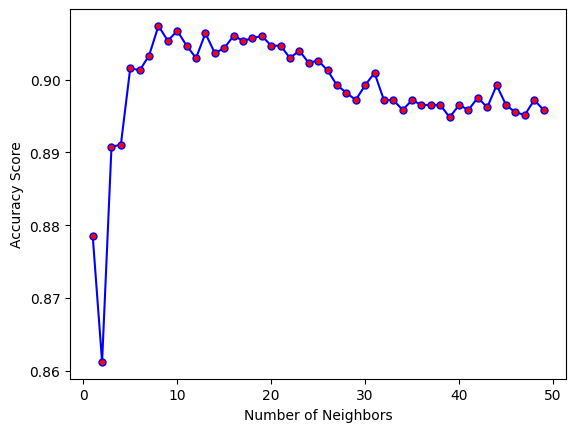

In [10]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='blue', linestyle='solid', marker='o',
         markerfacecolor='red', markersize=5)


plt.show()

In [11]:
scores = np.array(scores)

In [12]:
#Final result after training the model
print('Optimal No. Of Neighbors: ', scores.argmax()+1)
print('Accuracy Score: '+ str(scores.max()*100)+ ' %')

Optimal No. Of Neighbors:  8
Accuracy Score: 90.73634204275535 %


In [13]:
ypred = knn.predict(xtest)

In [14]:
ypred

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [15]:
ytest

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(ytest, ypred))

[[490   0   6   0   0   0]
 [ 40 430   1   0   0   0]
 [ 63  44 313   0   0   0]
 [  0   4   0 373 114   0]
 [  0   0   0  32 500   0]
 [  0   0   0   2   1 534]]


In [17]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.83      0.99      0.90       496
           2       0.90      0.91      0.91       471
           3       0.98      0.75      0.85       420
           4       0.92      0.76      0.83       491
           5       0.81      0.94      0.87       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.89      0.89      2947
weighted avg       0.90      0.90      0.89      2947



In [18]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

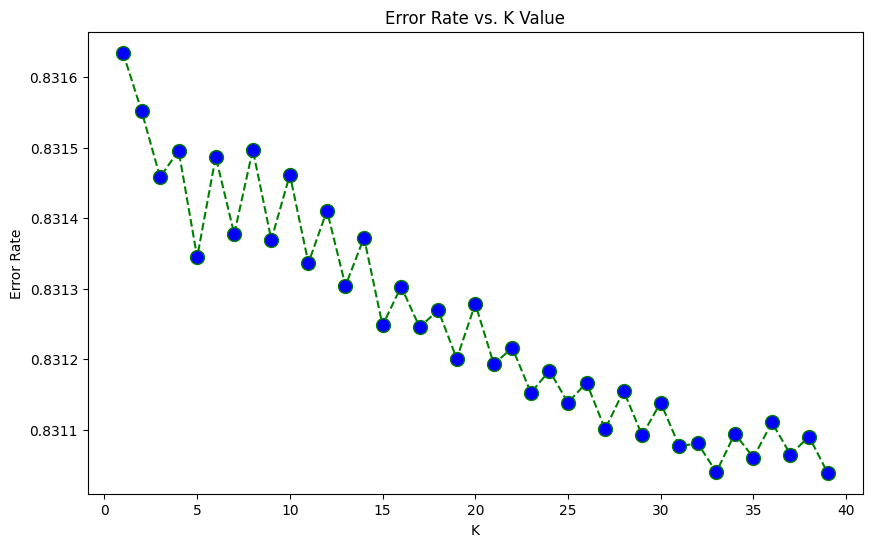

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='green', linestyle='--', markersize=10, markerfacecolor='blue', marker='o')

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

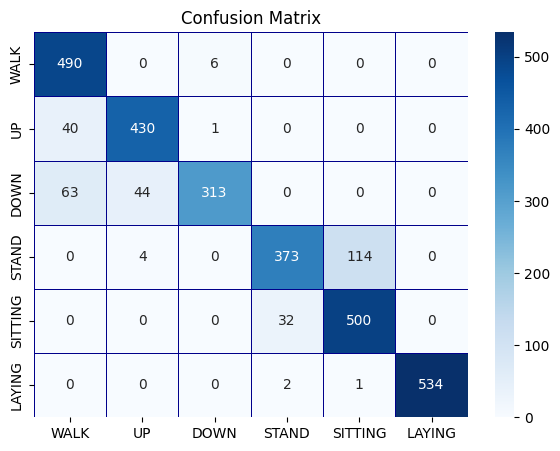

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_matrix_test = confusion_matrix(ytest, ypred)

# Create a DataFrame from the confusion matrix
confusion_matrix_df_test = pd.DataFrame(data=confusion_matrix_test,
                                        columns=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'],
                                        index=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'])

# Plot the heatmap for the test set
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df_test, annot=True, fmt='d', cmap="Blues", linecolor="DarkBlue", linewidths=0.55)
plt.title('Confusion Matrix')
plt.show()

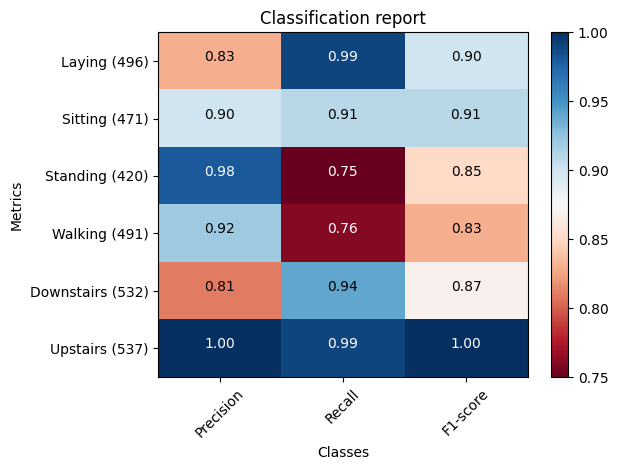

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()


def main():

    sampleClassificationReport = """             precision    recall  f1-score   support

           Laying      0.83      0.99      0.90       496
           Sitting       0.90      0.91      0.91       471
           Standing       0.98      0.75      0.85       420
           Walking       0.92      0.76      0.83       491
           Downstairs       0.81      0.94      0.87       532
           Upstairs       1.00      0.99      1.00       537
"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()


if __name__ == '__main__':
    main()

# Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression()

In [24]:
LogisticRegression().fit(xtrain, ytrain)

LogisticRegression()

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = []
for i in np.arange(0.1, 1.1 , 0.1):
    for y in ["l1", 'l2']:
        classifier= LogisticRegression(random_state = 5, max_iter=1000, C=i, penalty = y, solver = 'liblinear')
        classifier.fit(xtrain, ytrain)
        print("Training Score = " + str(classifier.score(xtrain, ytrain)))
        print("Test Score = " + str(classifier.score(xtest, ytest)))
        print("C = " + str(i) + ", penalty = " + str(y))

Training Score = 0.9755168661588683
Test Score = 0.9531727180183237
C = 0.1, penalty = l1
Training Score = 0.9813656147986942
Test Score = 0.9582626399728538
C = 0.1, penalty = l2
Training Score = 0.983949945593036
Test Score = 0.9589412962334578
C = 0.2, penalty = l1
Training Score = 0.9862622415669206
Test Score = 0.9602986087546658
C = 0.2, penalty = l2
Training Score = 0.9870783460282916
Test Score = 0.9616559212758737
C = 0.30000000000000004, penalty = l1
Training Score = 0.9880304678998912
Test Score = 0.9613165931455717
C = 0.30000000000000004, penalty = l2
Training Score = 0.9889825897714908
Test Score = 0.9592806243637597
C = 0.4, penalty = l1
Training Score = 0.9889825897714908
Test Score = 0.9616559212758737
C = 0.4, penalty = l2
Training Score = 0.9900707290533188
Test Score = 0.9602986087546658
C = 0.5, penalty = l1
Training Score = 0.9895266594124048
Test Score = 0.9616559212758737
C = 0.5, penalty = l2
Training Score = 0.9902067464635473
Test Score = 0.9613165931455717
C

In [26]:
print("Training Score = " + str(classifier.score(xtrain, ytrain)))
print("Test Score = " + str(classifier.score(xtest, ytest)))

Training Score = 0.9908868335146899
Test Score = 0.9619952494061758


In [27]:
ypred = classifier.predict(xtest)
ypred

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [28]:
ytest

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [29]:
print(confusion_matrix(ytest, ypred))

[[494   0   2   0   0   0]
 [ 23 448   0   0   0   0]
 [  4   9 407   0   0   0]
 [  0   4   0 432  55   0]
 [  2   0   0  13 517   0]
 [  0   0   0   0   0 537]]


In [30]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.88      0.92       491
           5       0.90      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



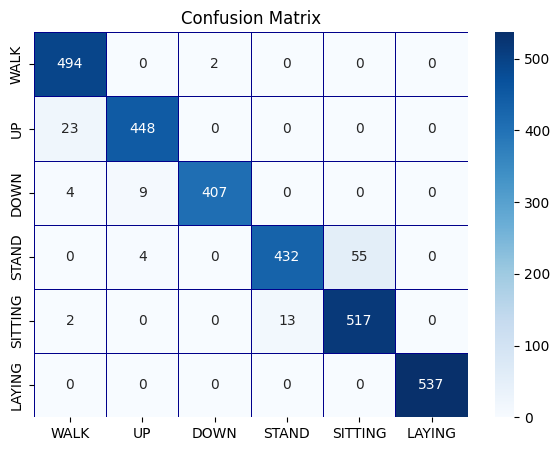

In [31]:
confusion_matrix_test = confusion_matrix(ytest, ypred)

# Create a DataFrame from the confusion matrix
confusion_matrix_df_test = pd.DataFrame(data=confusion_matrix_test,
                                        columns=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'],
                                        index=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'])

# Plot the heatmap for the test set
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df_test, annot=True, fmt='d', cmap="Blues", linecolor="DarkBlue", linewidths=0.55)
plt.title('Confusion Matrix')
plt.show()

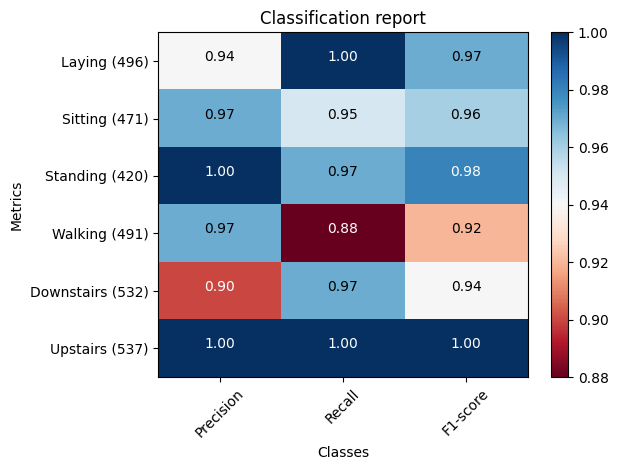

In [32]:
def main():

    sampleClassificationReport = """             precision    recall  f1-score   support

           Laying      0.94      1.00      0.97       496
           Sitting       0.97      0.95      0.96       471
           Standing       1.00      0.97      0.98       420
           Walking       0.97      0.88      0.92       491
           Downstairs       0.90      0.97      0.94       532
           Upstairs       1.00      1.00      1.00       537
"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()


if __name__ == '__main__':
    main()

# svm

In [33]:
from sklearn import svm
svm=svm.SVC()

In [34]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 10]}]

In [35]:
model=GridSearchCV(svm,parameters,n_jobs=-1,cv=4,verbose=4)

In [36]:
xtrain = np.asarray(xtrain)
ytrain = np.asarray(ytrain)

In [37]:
model.fit(xtrain,ytrain.ravel().T)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 10], 'kernel': ['linear']}],
             verbose=4)

In [38]:
from sklearn.metrics import accuracy_score
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)

In [39]:
ypred

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [40]:
print ('Best Parameters: '+ str(model.best_params_))
print ('Accuracy Score: '+ str(accuracy*100) + ' %')

Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy Score: 96.57278588394978 %


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
ytest

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
print(confusion_matrix(ytest, ypred))

[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


In [45]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.97      0.96      0.97       471
           3       0.99      0.97      0.98       420
           4       0.97      0.89      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.97      2947



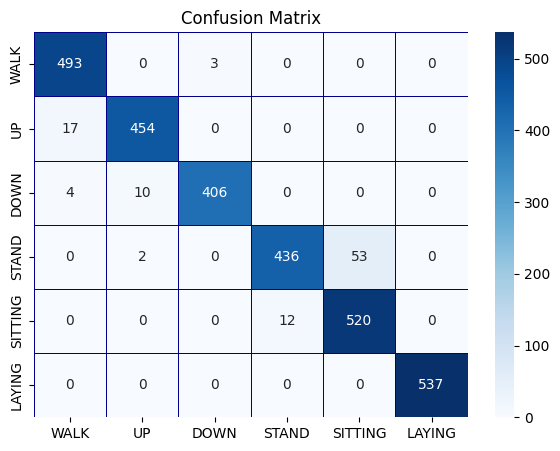

In [47]:
confusion_matrix_test = confusion_matrix(ytest, ypred)

# Create a DataFrame from the confusion matrix
confusion_matrix_df_test = pd.DataFrame(data=confusion_matrix_test,
                                        columns=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'],
                                        index=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'])

# Plot the heatmap for the test set
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df_test, annot=True, fmt='d', cmap="Blues", linecolor="DarkBlue", linewidths=0.55)
plt.title('Confusion Matrix')
plt.show()

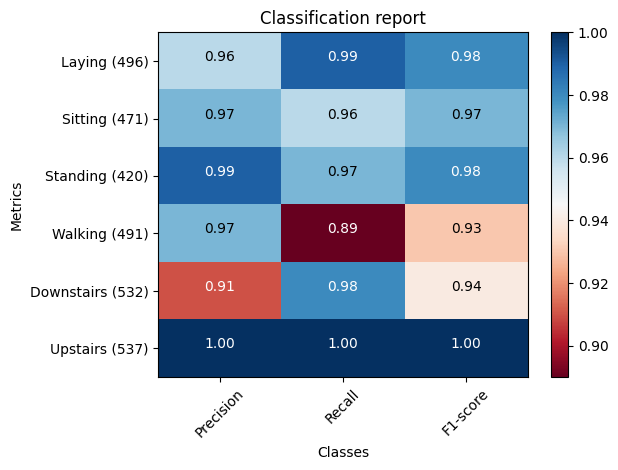

In [48]:
def main():

    sampleClassificationReport = """             precision    recall  f1-score   support

           Laying      0.96      0.99      0.98       496
           Sitting       0.97      0.96      0.97       471
           Standing       0.99      0.97      0.98       420
           Walking       0.97      0.89      0.93       491
           Downstairs      0.91      0.98      0.94       532
           Upstairs       1.00      1.00      1.00       537
"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()


if __name__ == '__main__':
    main()

# RFC

In [49]:
rfc = RandomForestClassifier()

In [50]:
parameters = {'n_estimators': [10, 100, 1000], 'max_depth': [3, 6, 9], 'max_features' : ['auto', 'log2']}

In [51]:
model=GridSearchCV(rfc,parameters,n_jobs=-1,cv=4,scoring='accuracy',verbose=4)

In [52]:
model.fit(xtrain,ytrain.ravel().T)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=4)

In [53]:
from sklearn.metrics import accuracy_score
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)

In [54]:
print ('Best Parameters: '+ str(model.best_params_))
print ('Accuracy Score: '+ str(accuracy*100) + ' %')

Best Parameters: {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 1000}
Accuracy Score: 92.56871394638615 %


In [55]:
ypred

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [56]:
ytest

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [57]:
print(confusion_matrix(ytest, ypred))

[[484   1  11   0   0   0]
 [ 29 436   6   0   0   0]
 [ 31  47 342   0   0   0]
 [  0   0   0 406  85   0]
 [  0   0   0   9 523   0]
 [  0   0   0   0   0 537]]


In [58]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.89      0.98      0.93       496
           2       0.90      0.93      0.91       471
           3       0.95      0.81      0.88       420
           4       0.98      0.83      0.90       491
           5       0.86      0.98      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.92      2947



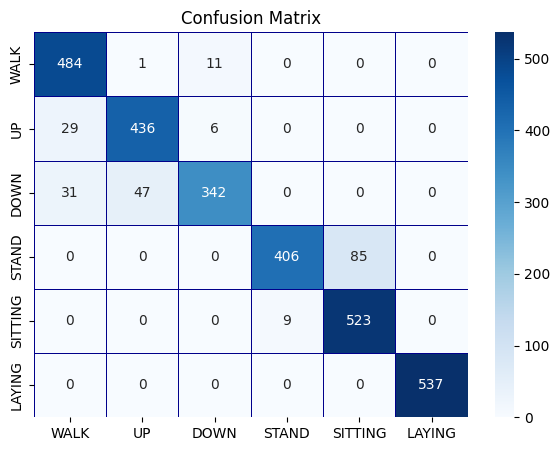

In [59]:
confusion_matrix_test = confusion_matrix(ytest, ypred)

# Create a DataFrame from the confusion matrix
confusion_matrix_df_test = pd.DataFrame(data=confusion_matrix_test,
                                        columns=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'],
                                        index=['WALK', 'UP', 'DOWN', 'STAND', 'SITTING', 'LAYING'])

# Plot the heatmap for the test set
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df_test, annot=True, fmt='d', cmap="Blues", linecolor="DarkBlue", linewidths=0.55)
plt.title('Confusion Matrix')
plt.show()

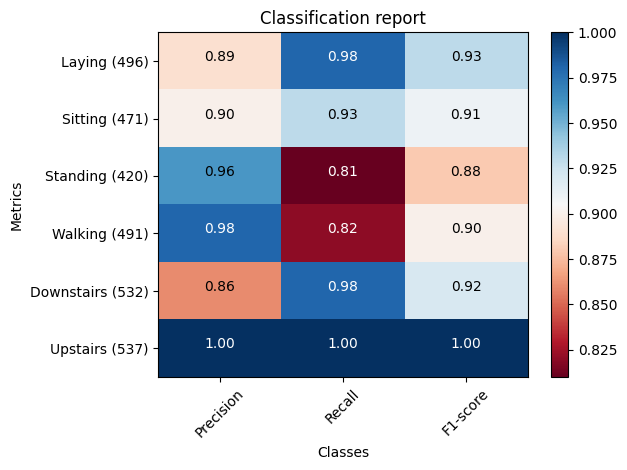

In [60]:
def main():

    sampleClassificationReport = """             precision    recall  f1-score   support

           Laying      0.89      0.98      0.93       496
           Sitting       0.90      0.93      0.91       471
           Standing       0.96      0.81      0.88       420
           Walking       0.98      0.82      0.90       491
           Downstairs      0.86      0.98      0.92       532
           Upstairs       1.00      1.00      1.00       537
"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()


if __name__ == '__main__':
    main()